🔄 Carregando empenhos de: C:\Users\Pedro\Downloads\Projeto_PortalTransparencia\Projeto_Saldo_Empenhos\data\trusted\2024\empenhos\empenhos_2024_processadas.xlsx
✅ 92 empenhos carregados.

--- Iniciando coleta de dados de pagamentos para cada empenho ---

🔍 Processando empenho 153010152442024NE001263...
   💰 Valor Empenhado: R$ 32,000.00
   💸 Total Pago: R$ 0.00
   💳 Saldo: R$ 32,000.00
   📊 Execução: 0.0%

🔍 Processando empenho 344001342012022NE000223...
✅ Pagamento(s) relacionado(s) ao empenho 344001342012022NE000223: Página 1 com 11 registro(s)
   💰 Valor Empenhado: R$ 2,537.83
   💸 Total Pago: R$ 21,466.80
   💳 Saldo: R$ -18,928.97
   📊 Execução: 845.9%

🔍 Processando empenho 153010152442024NE000060...
✅ Pagamento(s) relacionado(s) ao empenho 153010152442024NE000060: Página 1 com 67 registro(s)
   💰 Valor Empenhado: R$ 546,317.36
   💸 Total Pago: R$ 561,019.89
   💳 Saldo: R$ -14,702.53
   📊 Execução: 102.7%

🔍 Processando empenho 153010152442022NE000187...
✅ Pagamento(s) relacionado(

,codigo_empenho,valor_empenho,total_pago,saldo,percentual_executado,observacao,qtd_pagamentos
0,153010152442024NE001263,32000.00,0.00,32000.00,0.000000,MANUTENCAO PREDIAL - MARIA DA GRACA,0
1,344001342012022NE000223,2537.83,21466.80,-18928.97,845.872261,REGISTRO DE CANCELAMENTO DE RESTOS A PAGAR BLO...,11
2,153010152442024NE000060,546317.36,561019.89,-14702.53,102.691207,REGISTRO DE ANULACAO/REFORCO/CANCELAMENTO DO E...,67
3,153010152442022NE000187,0.00,83037.34,-83037.34,0.000000,REGISTRO DE CANCELAMENTO DE RESTOS A PAGAR BLO...,41
4,153162152362022NE000042,0.00,94107.22,-94107.22,0.000000,REGISTRO DE CANCELAMENTO DE RESTOS A PAGAR BLO...,20


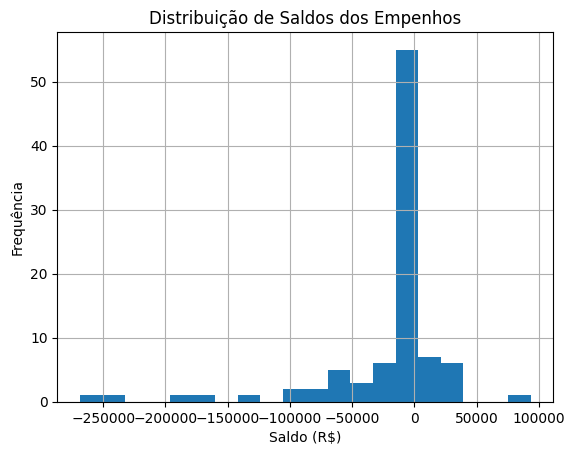

In [3]:
import sys
import os

# Adiciona o diretório raiz do projeto ao caminho do Python
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), os.pardir)))


# Importa o módulo de cálculo de saldos da pasta src/
from src.calculate_balances import calcular_saldos, CAMINHO_CSV

# Executa a função principal para obter os DataFrames
df_saldos, df_detalhes_pagamentos = calcular_saldos(CAMINHO_CSV)


if df_saldos is not None:
    print("\n--- Visualização de Saldos ---")
    # A função head() e display() funcionam melhor em notebooks
    display(df_saldos.head())
    
    # Exemplo: Gráfico de distribuição de saldos
    import matplotlib.pyplot as plt
    df_saldos['saldo'].hist(bins=20)
    plt.title('Distribuição de Saldos dos Empenhos')
    plt.xlabel('Saldo (R$)')
    plt.ylabel('Frequência')
    plt.show()

# Você pode continuar com sua análise exploratória aqui

## Documentos relacionados

In [10]:
import requests
import os
from dotenv import load_dotenv
from pathlib import Path

# para encontrar o arquivo .env
caminho_env = Path('.').resolve().parent / '.env'
load_dotenv(dotenv_path=caminho_env)

API_KEY = os.getenv('PORTAL_TRANSPARENCIA_API_KEY')

# Verifica se a chave foi carregada corretamente
if not API_KEY:
    print("❌ Erro: A chave da API não foi carregada. Verifique se o arquivo .env existe na pasta raiz do projeto.")
else:
    print("✅ Chave da API carregada com sucesso.")
    empenho_teste = '344001342012022NE000223'  # Exemplo de empenho para teste
    url = 'https://api.portaldatransparencia.gov.br/api-de-dados/despesas/documentos-relacionados'
    params = {
        'codigoDocumento': empenho_teste,
        'fase': 1,
        'pagina': 1
    }
    headers = {
        'chave-api-dados': API_KEY,
        'accept': '*/*'
    }

    try:
        response = requests.get(url, params=params, headers=headers)
        response.raise_for_status() # Lança um erro para status 4xx/5xx
        
        dados = response.json()
        print(f"Dados brutos para o empenho {empenho_teste}:")
        print(dados) # Imprime o JSON completo da resposta

    except requests.exceptions.RequestException as err:
        print(f"❌ Erro na requisição: {err}")
        print(f"Status: {response.status_code}")
        print(f"Resposta da API: {response.text}")
#salvando o resultado em um arquivo JSON
    with open('resultado_empenho.json', 'w') as f:
        import json
        json.dump(dados, f, indent=4)
    print("✅ Resultado salvo em 'resultado_empenho.json'")

✅ Chave da API carregada com sucesso.
Dados brutos para o empenho 344001342012022NE000223:
[{'data': '31/12/2022', 'fase': 'Liquidação', 'documento': '344001342012022NS001477', 'documentoResumido': '2022NS001477', 'especie': '', 'orgaoSuperior': 'Ministério da Cultura', 'orgaoVinculado': 'Fundação Casa de Rui Barbosa', 'unidadeGestora': 'FUNDACAO CASA DE RUI BARBOSA', 'elementoDespesa': 'Múltiplo', 'favorecido': 'Sem informação', 'valor': '0,00'}, {'data': '29/12/2023', 'fase': 'Liquidação', 'documento': '344001342012023NS001839', 'documentoResumido': '2023NS001839', 'especie': '', 'orgaoSuperior': 'Ministério da Cultura', 'orgaoVinculado': 'Fundação Casa de Rui Barbosa', 'unidadeGestora': 'FUNDACAO CASA DE RUI BARBOSA', 'elementoDespesa': 'Locação de Mão-de-Obra', 'favorecido': 'CONSTRUTORA EDIL LTDA', 'valor': '0,00'}, {'data': '06/03/2023', 'fase': 'Liquidação', 'documento': '344001342012023NS000247', 'documentoResumido': '2023NS000247', 'especie': '', 'orgaoSuperior': 'Ministério d

## Historico Empenho

In [13]:
import requests
import time
from dotenv import load_dotenv
import os

# Carregar chave da API
load_dotenv()
API_KEY = os.getenv('PORTAL_TRANSPARENCIA_API_KEY')
if not API_KEY:
    raise ValueError("❌ A chave da API (PORTAL_TRANSPARENCIA_API_KEY) não está definida.")

def consultar_historico_empenho(codigo_empenho: str, sequencial: int = 1, pagina: int = 1):
    """
    Consulta o histórico de reforços e anulações de um empenho no Portal da Transparência.

    Args:
        codigo_empenho (str): Código completo do empenho (ex: '153010152442022NE000013').
        sequencial (int): Número do sequencial (em geral 1).
        pagina (int): Página da consulta (em geral 1).

    Returns:
        list: Lista com os dados de histórico (inclusão, reforço, anulação, etc.).
    """
    url = 'https://api.portaldatransparencia.gov.br/api-de-dados/despesas/itens-de-empenho/historico'
    headers = {
        'chave-api-dados': API_KEY,
        'accept': '*/*'
    }
    params = {
        'codigoDocumento': codigo_empenho,
        'sequencial': sequencial,
        'pagina': pagina
    }

    try:
        response = requests.get(url, headers=headers, params=params)
        response.raise_for_status()
        dados = response.json()
        print(f"✅ Histórico do empenho {codigo_empenho} retornou {len(dados)} registro(s)")
        return dados
    except requests.exceptions.RequestException as e:
        print(f"❌ Erro ao consultar histórico do empenho {codigo_empenho}: {e}")
        return []

# Exemplo de uso:
if __name__ == "__main__":
    codigo = "344001342012022NE000223"
    historico = consultar_historico_empenho(codigo)
    for item in historico:
        print(item)

# salvando o resultado em arquivo JSON
with open('historico_empenho.json', 'w') as f:
    import json
    json.dump(historico, f, indent=4)
print("✅ Histórico salvo em 'historico_empenho.json'") 


✅ Histórico do empenho 344001342012022NE000223 retornou 4 registro(s)
{'data': '29/12/2022', 'operacao': 'INCLUSAO', 'quantidade': '0,04', 'valorUnitario': '83.020,19', 'valorTotal': '3.618,02'}
{'data': '14/01/2023', 'operacao': 'INSCRICAO EM RP', 'quantidade': '1,00', 'valorUnitario': '10.000,00', 'valorTotal': '10.000,00'}
{'data': '29/12/2022', 'operacao': 'INCLUSAO', 'quantidade': '0,04', 'valorUnitario': '83.020,19', 'valorTotal': '3.618,02'}
{'data': '14/01/2023', 'operacao': 'INSCRICAO EM RP', 'quantidade': '1,00', 'valorUnitario': '10.000,00', 'valorTotal': '10.000,00'}
✅ Histórico salvo em 'historico_empenho.json'


In [34]:
def coletar_itens_empenho_completos(codigo_empenho, max_sequenciais=20):
    """
    Consulta todos os itens de um empenho até encontrar vários sequenciais vazios.
    Retorna um dicionário com sequencial como chave e lista de operações como valor.
    """
    resultados = {}
    sequencial = 1
    falhas_consecutivas = 0
    limite_falhas = 3  # pode ajustar para 5, se quiser forçar mais tentativas

    while sequencial <= max_sequenciais:
        dados = consultar_historico_empenho(codigo_empenho, sequencial=sequencial)
        if dados:
            print(f"✅ Histórico do empenho {codigo_empenho}, sequencial {sequencial} retornou {len(dados)} registro(s)")
            resultados[sequencial] = dados
            falhas_consecutivas = 0  # zera o contador de falhas
        else:
            print(f"⚠️ Nenhum dado encontrado para sequencial {sequencial}. Continuando busca...")
            falhas_consecutivas += 1
            if falhas_consecutivas >= limite_falhas:
                print(f"🔚 Parando busca após {falhas_consecutivas} sequenciais vazios consecutivos.")
                break
        sequencial += 1
        time.sleep(0.3)

    return resultados

#utilizando a função para coletar todos os itens de um empenho específico
if __name__ == "__main__":
    codigo = "344001342012021NE000082"
    historico = coletar_itens_empenho_completos(codigo)
    for sequencial, itens in historico.items():
        print(f"Sequencial {sequencial}:")
        for item in itens:
            print(item)


✅ Histórico do empenho 344001342012021NE000082 retornou 4 registro(s)
✅ Histórico do empenho 344001342012021NE000082, sequencial 1 retornou 4 registro(s)
✅ Histórico do empenho 344001342012021NE000082 retornou 4 registro(s)
✅ Histórico do empenho 344001342012021NE000082, sequencial 2 retornou 4 registro(s)
✅ Histórico do empenho 344001342012021NE000082 retornou 4 registro(s)
✅ Histórico do empenho 344001342012021NE000082, sequencial 3 retornou 4 registro(s)
✅ Histórico do empenho 344001342012021NE000082 retornou 0 registro(s)
⚠️ Nenhum dado encontrado para sequencial 4. Continuando busca...
✅ Histórico do empenho 344001342012021NE000082 retornou 0 registro(s)
⚠️ Nenhum dado encontrado para sequencial 5. Continuando busca...
✅ Histórico do empenho 344001342012021NE000082 retornou 0 registro(s)
⚠️ Nenhum dado encontrado para sequencial 6. Continuando busca...
🔚 Parando busca após 3 sequenciais vazios consecutivos.
Sequencial 1:
{'data': '31/05/2021', 'operacao': 'REFORCO', 'quantidade': 